# 1. Introduction
## **Project Overview:**
    - Objective: Predicting the closing stock price of NASDAQ: NVDA for the trading days from 25 October to 7 November.
    - Methodologies: Time Series Analysis, Machine Learning Models, ARIMA Models.

# 2. Data Collection
   - **Data Sources:**
       - Historical stock prices: [Yahoo Finance](https://finance.yahoo.com/quote/NVDA/history?p=NVDA).
       - Economic Indicators (optional): Interest rates, GDP growth, unemployment rates, etc.

In [41]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-15,237.610001,242.860001,233.600006,242.279999,242.234970,52448600
2023-03-16,240.270004,255.880005,238.940002,255.410004,255.362534,58325300
2023-03-17,259.820007,263.989990,256.679993,257.250000,257.202209,84854700
2023-03-20,256.149994,260.239990,251.300003,259.000000,258.951874,43274700
2023-03-21,261.799988,263.920013,253.809998,261.989990,261.941315,54740800
...,...,...,...,...,...,...
2023-10-17,440.000000,447.540009,424.799988,439.380005,439.380005,81233300
2023-10-18,425.910004,432.190002,418.250000,421.959991,421.959991,62729400
2023-10-19,428.109985,432.970001,418.820007,421.010010,421.010010,50123300


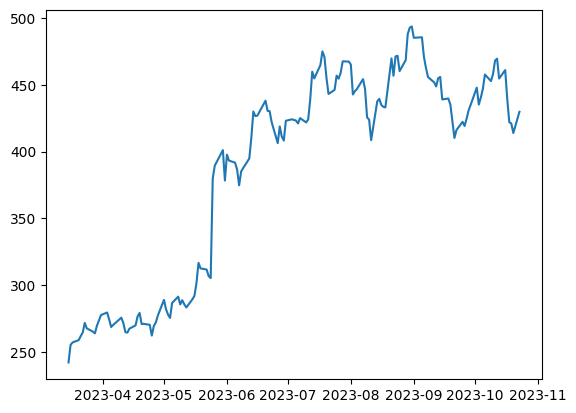

In [43]:
data = yf.download("NVDA", start="2023-3-15", end="2023-10-24",  interval = "1d")
plt.plot(data['Close'])
data

In [44]:
# Split data into training and testing set
dataset_train = data[:-10]
dataset_test = data[-10:]
training_set = dataset_train.iloc[:, 3:4]


# 3. Data Preprocessing
  - Data scaling
  - creating windows for LSTM

In [45]:
# Data scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [46]:
# Creating sequences of 100 days of past data to predict the next 14 days
X_train, y_train = [], []
for i in range(100, len(training_set_scaled) - 10 + 1):
    print(f"Train: {i-100}-{i-1}\tTest: {i}-{i+9}")
    X_train.append(training_set_scaled[i-100:i, 0])
    y_train.append(training_set_scaled[i:i+10, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape, y_train.shape

Train: 0-99	Test: 100-109
Train: 1-100	Test: 101-110
Train: 2-101	Test: 102-111
Train: 3-102	Test: 103-112
Train: 4-103	Test: 104-113
Train: 5-104	Test: 105-114
Train: 6-105	Test: 106-115
Train: 7-106	Test: 107-116
Train: 8-107	Test: 108-117
Train: 9-108	Test: 109-118
Train: 10-109	Test: 110-119
Train: 11-110	Test: 111-120
Train: 12-111	Test: 112-121
Train: 13-112	Test: 113-122
Train: 14-113	Test: 114-123
Train: 15-114	Test: 115-124
Train: 16-115	Test: 116-125
Train: 17-116	Test: 117-126
Train: 18-117	Test: 118-127
Train: 19-118	Test: 119-128
Train: 20-119	Test: 120-129
Train: 21-120	Test: 121-130
Train: 22-121	Test: 122-131
Train: 23-122	Test: 123-132
Train: 24-123	Test: 124-133
Train: 25-124	Test: 125-134
Train: 26-125	Test: 126-135
Train: 27-126	Test: 127-136
Train: 28-127	Test: 128-137
Train: 29-128	Test: 129-138
Train: 30-129	Test: 130-139
Train: 31-130	Test: 131-140
Train: 32-131	Test: 132-141
Train: 33-132	Test: 133-142
Train: 34-133	Test: 134-143


((35, 100, 1), (35, 10))

# 4. Model Building & Value Forecasting

In [49]:
from tensorflow import keras
keras.utils.set_random_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=10)) # output 10 values for 10 days
model.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_15 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_16 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [51]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
2/2 [==============================] - 6s 158ms/step - loss: 0.6735
Epoch 2/50
2/2 [==============================] - 0s 187ms/step - loss: 0.5587
Epoch 3/50
2/2 [==============================] - 0s 191ms/step - loss: 0.4466
Epoch 4/50
2/2 [==============================] - 0s 189ms/step - loss: 0.2965
Epoch 5/50
2/2 [==============================] - 0s 192ms/step - loss: 0.1595
Epoch 6/50
2/2 [==============================] - 0s 181ms/step - loss: 0.1020
Epoch 7/50
2/2 [==============================] - 0s 206ms/step - loss: 0.0959
Epoch 8/50
2/2 [==============================] - 1s 631ms/step - loss: 0.0807
Epoch 9/50
2/2 [==============================] - 1s 307ms/step - loss: 0.0778
Epoch 10/50
2/2 [==============================] - 0s 213ms/step - loss: 0.0635
Epoch 11/50
2/2 [==============================] - 1s 337ms/step - loss: 0.0717
Epoch 12/50
2/2 [==============================] - 0s 117ms/step - loss: 0.0710
Epoch 13/50
2/2 [==============================] 

In [58]:
X_test = training_set_scaled[-100:,0]
X_test = np.reshape(X_test, (1, X_test.shape[0], 1))

X_test.shape

(1, 100, 1)

In [59]:
real_stock_price = dataset_test.iloc[:, 3:4].values
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 59ms/step


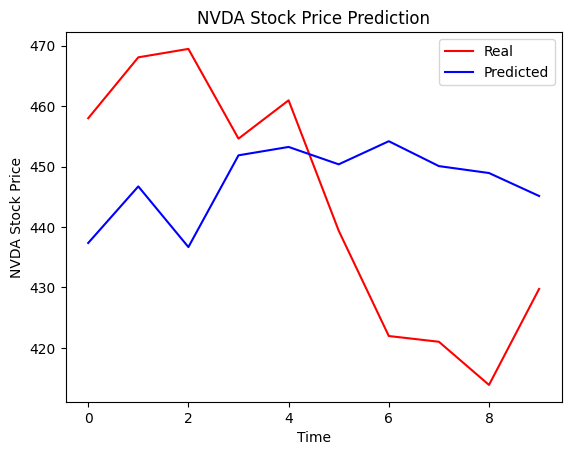

In [60]:
plt.plot(real_stock_price, color = 'red', label = 'Real')
plt.plot(predicted_stock_price[0], color = 'blue', label = 'Predicted')
plt.title('NVDA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NVDA Stock Price')
plt.legend()
plt.show()

In [107]:
X_for_10_days = data.iloc[-100:, 3:4]
X_for_10_days_scaled = sc.fit_transform(X_for_10_days)
X_for_10_days_scaled = np.reshape(X_for_10_days_scaled, (1, X_for_10_days_scaled.shape[0], 1))
X_for_10_days.shape

(100, 1)

In [108]:
# predict the next 10 days closing price, scaled
y_for_10_days_scaled = model.predict(X_for_10_days_scaled)


1/1 [==============================] - 0s 53ms/step


In [69]:
y_for_10_days_scaled.shape

(1, 10)

In [109]:
# Convert the scaled value back to normal scale
y_for_10_days = sc.inverse_transform(y_for_10_days_scaled)
print(y_for_10_days.shape)
print(type(y_for_10_days))
y_for_10_days


(1, 10)
<class 'numpy.ndarray'>


array([[462.408  , 467.04083, 462.838  , 469.12592, 470.05048, 468.38977,
        471.3291 , 468.97818, 469.6633 , 465.63754]], dtype=float32)

In [110]:
last_date = data.index[-1]
print(last_date)

# Create a list of dates after last date in training data to `step` periods in the future
# turn them into datetime objects
step = 10
forecast_dates = pd.date_range(last_date, periods=step + 1, freq='B')[1:]
combined_dates = pd.to_datetime([last_date]).append(forecast_dates)
combined_fc = np.insert(y_for_10_days, 0, data['Close'].iloc[-1])


2023-10-23 00:00:00


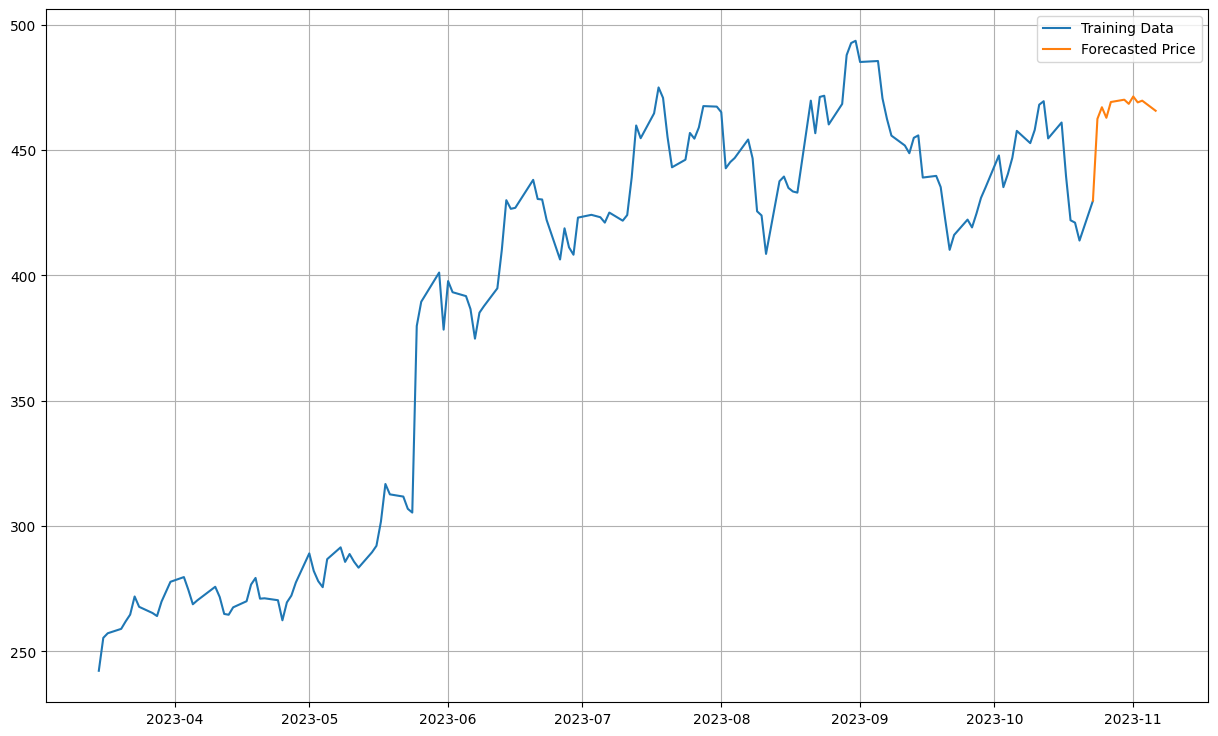

In [111]:
# plot the training data and the forecasted values
plt.figure(figsize=(15, 9))
plt.grid(True)
plt.plot(data.index, data['Close'], label='Training Data')
plt.plot(combined_dates, combined_fc, label='Forecasted Price')
plt.legend()
plt.show()

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
